In [42]:
import seaborn as sns
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
X, Y = data.sample_gmm_2d(5, 2, 10)
model = LogisticRegression(C=1e5)
model.fit(X, Y.ravel())

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

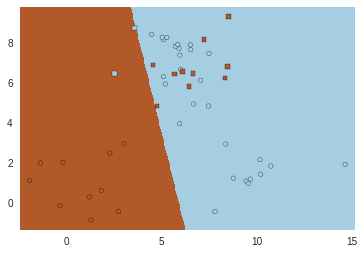

In [35]:
data.graph_data_pred(X, Y, model)

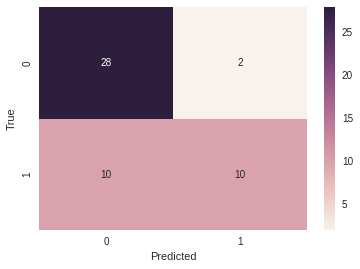

In [46]:
sns.heatmap(confusion_matrix(Y, model.predict(X)), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [47]:
print(classification_report(Y, model.predict(X)))

             precision    recall  f1-score   support

          0       0.74      0.93      0.82        30
          1       0.83      0.50      0.62        20

avg / total       0.78      0.76      0.74        50

